[Reference](https://medium.com/swlh/detecting-fake-news-with-python-and-machine-learning-f78421d29a06) <br>
[Text Classification](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)



In [88]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 3 08:06:15 2020

@author: Sangyun
"""

'\nCreated on Thu Sep 3 08:06:15 2020\n\n@author: Sangyun\n'

![WorkFlow](https://miro.medium.com/max/1400/1*6ku25gAB-_SLtxVNyBkl9w.jpeg)

In [ ]:
import re
import string

import numpy as np 
import pandas as pd
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from nltk.corpus import stopwords
import nltk
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-plot
import scikitplot as skplt
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#import methods
from sklearn.naive_bayes import MultinomialNB 
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier

import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from itertools import islice
import logging
import gensim
from gensim.models import Word2Vec

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [ ]:
df = pd.read_csv("review_complexity.csv", encoding = 'latin-1')

In [ ]:
# DROP DUPLICATES
df.drop_duplicates(subset=['text'], keep='first',inplace=True)
df.shape

(358081, 9)

In [ ]:
# "-1" label: Fake / "1" label: Real
df.head(10)

,user_id,prod_id,date,text,rating,label,length,words,complexity
0,923,0,2014-12-08,The food at snack is a selection of popular Gr...,3.0,-1,40.0,"['the', 'food', 'at', 'snack', 'be', 'a', 'sel...",30.0
1,924,0,2013-05-16,This little place in Soho is wonderful. I had ...,3.0,-1,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
2,925,0,2013-07-01,ordered lunch for 15 from Snack last Friday. Â...,4.0,-1,32.0,"['order', 'lunch', 'for', 'from', 'snack', 'la...",29.0
3,926,0,2011-07-28,This is a beautiful quaint little restaurant o...,4.0,-1,90.0,"['this', 'be', 'a', 'beautiful', 'quaint', 'li...",63.0
4,927,0,2010-11-01,Snack is great place for a Â casual sit down l...,4.0,-1,102.0,"['snack', 'be', 'great', 'place', 'for', 'a', ...",81.0
5,928,0,2009-09-02,A solid 4 stars for this greek food spot. Â If...,4.0,-1,41.0,"['a', 'solid', 'star', 'for', 'this', 'greek',...",34.0
6,929,0,2009-08-25,Let me start with a shout-out to everyone who ...,4.0,-1,133.0,"['let', 'me', 'start', 'with', 'a', 'shout', '...",98.0
7,930,0,2007-05-20,Love this place! Â Try the Chicken sandwich or...,4.0,-1,22.0,"['love', 'this', 'place', 'try', 'the', 'chick...",19.0
8,931,0,2005-12-27,My friend and I were intrigued by the nightly ...,4.0,-1,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0
9,932,0,2014-05-09,Stopped in for lunch today and couldn't believ...,5.0,-1,45.0,"['stop', 'in', 'for', 'lunch', 'today', 'and',...",41.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358081 entries, 0 to 358957
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     358081 non-null  int64  
 1   prod_id     358081 non-null  int64  
 2   date        358081 non-null  object 
 3   text        358080 non-null  object 
 4   rating      358081 non-null  float64
 5   label       358081 non-null  int64  
 6   length      358080 non-null  float64
 7   words       358080 non-null  object 
 8   complexity  358080 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 27.3+ MB


In [ ]:
df.shape

(358081, 9)

In [ ]:
# Change the labels
df.loc[(df['label'] == -1) , ['label']] = 'FAKE'
df.loc[(df['label'] == 1) , ['label']] = 'REAL'

In [ ]:
# Isolate the labels
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    FAKE
3    FAKE
4    FAKE
Name: label, dtype: object

In [ ]:
df.label.value_counts()

REAL    321528
FAKE     36553
Name: label, dtype: int64

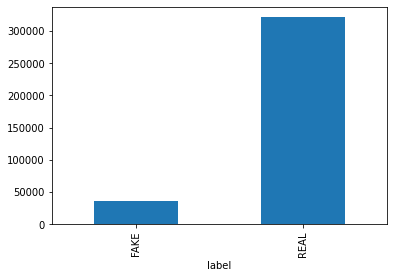

In [ ]:
df.groupby('label').text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
STOPWORDS = stopwords.words('english')
STOPWORDS.extend(['rt', 'http']) # extend stopwords; rt means re-tweet
STOPWORDS = set(STOPWORDS)

In [ ]:
def tokenization(text):
    text = str(text)
    word = text.split()
    return word
df['text'] = df['text'].apply(tokenization)

In [ ]:
def lowercase(word):
    new_word = list()
    for i in word:
        i = i.lower()
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(lowercase)

In [ ]:
import string as s

def remove_punctuations(word):
    new_word = list() 
    for i in word:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_punctuations)

In [ ]:
def remove_stopwords(word):
    # to_remove = ['but','no', 'not','isn']
    # stop_words_ = set(stopwords.words('english')).difference(to_remove)
    stop_words_ = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
                 "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
                 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's",
                 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
                 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was',
                 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                 'a', 'an', 'the', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
                 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above',
                 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',
                 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
                 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than',
                 'too', 'very', 's', 't', 'can', 'will', 'just', 'should', "should've", 'now', 'd', 'll', 'm',
                 'o', 're', 've', 'y']
    new_word = list()
    for i in word:
        if i not in stop_words_:
            new_word.append(i)
    return new_word

df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
def remove_numbers(word):
    no_num_word = list()
    new_word = list()
    for i in word:
        for j in s.digits:    
            i = i.replace(j,'')
        no_num_word.append(i)
    for i in no_num_word:
        if i!='':
            new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_numbers)

In [ ]:
def remove_spaces(word):
    new_word = list()
    for i in word:
        i = i.strip()
        new_word.append(i)
    return new_word
df['text'] = df['text'].apply(remove_spaces)

In [ ]:
df['text'] = df['text'].apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:
# change these to periods (nltk tokenizer uses periods to tokenize)
# and we really want to tokenize the hell out of the text
contra_words = ['however ','but ','although','nevertheless']
df['text'] = df['text'].str.replace('|'.join(contra_words), '. ')
# remove the words associated for when google translated a review
translated_terms = ['(translated google)', '(original)',
                    'translated by google''translate by google']
df['text'] = df['text'].str.replace('|'.join(translated_terms), ' ')

In [ ]:
# replace punctuation with period
df['text'] = df['text'].apply(lambda x: re.sub('[^\w\s]', '. ', x))

In [ ]:
# remove more than one space
df.text = df.text.replace('\s+', ' ', regex=True)

In [ ]:
# remove all single characters
df['text'] = df['text'].apply(lambda x: re.sub(r'\s+[a-zA-Z]\s+', ' ', x))

In [ ]:
# remove non ascii (non english words)
def remove_non_ascii(text):
    return ''.join([i if ord(i) < 128 else ' ' for i in text])
df['text'] = df['text'].apply(remove_non_ascii)

In [ ]:
def tokenize_eng_text(col):
   col = nltk.sent_tokenize(col)
   # col = ' '.join(col)
  #  print(col)
   return col
df['text'] = df['text'].apply(tokenize_eng_text)
# now remove periods (nltk tokenizes with periods)
df['text'] = df['text'].apply(lambda x: [y.replace('.', '') for y in x])

In [ ]:
# explode dataframe using tokenized list
# create df to explode
df.reset_index(drop=True,inplace=True)
df['extra_id'] = df.index
dfe = df[['extra_id','text']]
print('exploding text')
dfe = dfe.explode('text')
print(dfe)
# clean up for outputting
# before merging - erase text columns on df
del df['text']
# join exploded df to original data
df = pd.merge(dfe, df, how='left', on='extra_id')

exploding text
        extra_id                                               text
0              0  food snack selection popular greek dishes appe...
1              1  little place soho wonderful lamb sandwich and ...
1              1            then soho staff little snotty and rude 
1              1          food great dont expect worldclass service
2              2  ordered lunch snack last friday   time nothing...
...          ...                                                ...
358079    358079  appreciate good thin chewy crust love emily sa...
358079    358079  even without getting know must get smores calz...
358079    358079  one among best and great friendly service welc...
358079    358079  atmosphere and service really elevated experie...
358080    358080                                                nan

[811159 rows x 2 columns]


In [ ]:
# remove more than one space
dfe.text = dfe.text.replace('\s+', ' ', regex=True)
dfe = dfe[~pd.isnull(dfe['text'])]

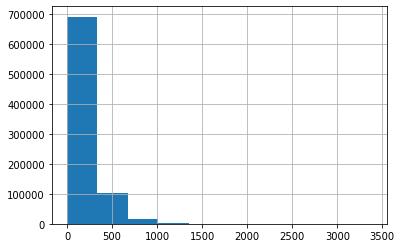

In [ ]:
df['text'].str.len().hist()

In [ ]:
df = df[pd.notnull(df['text'])]
df = df[df['text'].str.len() < 90]
df = df[df['text'].str.len() > 3]

In [ ]:
df.head()

,extra_id,text,user_id,prod_id,date,rating,label,length,words,complexity
1,1,little place soho wonderful lamb sandwich and ...,924,0,2013-05-16,3.0,FAKE,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
2,1,then soho staff little snotty and rude,924,0,2013-05-16,3.0,FAKE,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
3,1,food great dont expect worldclass service,924,0,2013-05-16,3.0,FAKE,52.0,"['this', 'little', 'place', 'in', 'soho', 'be'...",41.0
12,8,tiny able stand waited and glass wine narrow b...,931,0,2005-12-27,4.0,FAKE,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0
14,8,cinnamon overpowered flavors friend stuffed to...,931,0,2005-12-27,4.0,FAKE,104.0,"['my', 'friend', 'and', 'i', 'be', 'intrigue',...",68.0


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index','extra_id','words'],axis=1, inplace=True)

In [ ]:
df.head()

,text,user_id,prod_id,date,rating,label,length,complexity
0,little place soho wonderful lamb sandwich and ...,924,0,2013-05-16,3.0,FAKE,52.0,41.0
1,then soho staff little snotty and rude,924,0,2013-05-16,3.0,FAKE,52.0,41.0
2,food great dont expect worldclass service,924,0,2013-05-16,3.0,FAKE,52.0,41.0
3,tiny able stand waited and glass wine narrow b...,931,0,2005-12-27,4.0,FAKE,104.0,68.0
4,cinnamon overpowered flavors friend stuffed to...,931,0,2005-12-27,4.0,FAKE,104.0,68.0


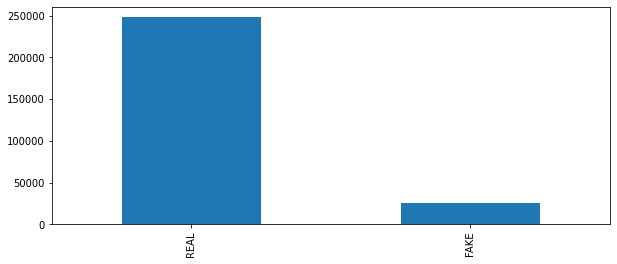

In [ ]:
my_labels = ['FAKE','REAL']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

# make equal number of each label

![unbalanced](https://cdn-images-1.medium.com/max/1000/1*P93SeDGPGw0MhwvCcvVcXA.png)

In [ ]:
df['label'].value_counts()

REAL    248134
FAKE     26009
Name: label, dtype: int64

In [ ]:
size = 100000 # sample size
replace = True # with replacement (if you want it to select same row again)
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df = df.groupby('label', as_index=False).apply(fn)
print(df['label'].value_counts())

FAKE    100000
REAL    100000
Name: label, dtype: int64


In [ ]:
# # SMOTE
# from imblearn.over_sampling import SMOTE

# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='minority', random_state=7)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = normalized_df.columns

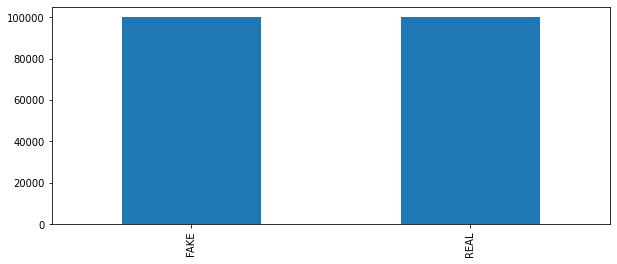

In [ ]:
my_labels = ['FAKE','REAL']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

In [ ]:
# # Stopwords
# stopwords = STOPWORDS
# stopwords = list(stopwords)
# STOPWORDS = nltk.corpus.stopwords.words('english')
# stopwords = stopwords + STOPWORDS

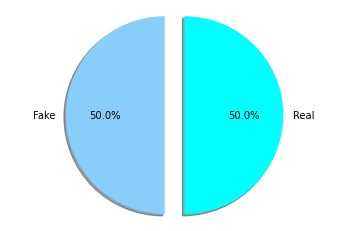

In [ ]:
count_Class = pd.value_counts(df.label, sort = True)

# Data to Plot
labels = 'Fake', 'Real'
sizes = [count_Class[0], count_Class[1]]
colors = ['lightskyblue', 'aqua']
explode = (0.1, 0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

In [ ]:
X = df.text
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}

from collections import Counter
words_counts = Counter([word for line in X_train for word in line.split(' ')])

# Sorting 
most_common_words = sorted(words_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Top 10
most_common_words[:10]

[('', 118157),
 ('and', 42704),
 ('food', 22360),
 ('good', 20129),
 ('place', 18670),
 ('not', 17054),
 ('great', 15977),
 ('service', 8811),
 ('go', 7693),
 ('best', 7486)]

In [ ]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit & transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 
tfidf_test=tfidf_vectorizer.transform(X_test)

# Initialize the PassiveAggressiveClassifier and fit training sets
pa_classifier=PassiveAggressiveClassifier(max_iter=50)
pa_classifier.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
# Predict and calculate accuracy
y_pred=pa_classifier.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 67.22%


In [ ]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[23360,  9453],
       [12180, 21007]])

# Split train and test data

In [ ]:
X = df.text
y = df.label
train_set, test_set, train_label, test_label = train_test_split(df, df['label'], test_size=0.33, random_state = 42)
print(train_set.shape)
print(test_set.shape)
print("\nThe Trainset consists of {} records and {} features".format(train_set.shape[0],train_set.shape[1]))
print("\nThe Testset consists of {} records and {} features".format(test_set.shape[0],train_set.shape[1]))

(134000, 8)
(66000, 8)

The Trainset consists of 134000 records and 8 features

The Testset consists of 66000 records and 8 features


# Extract N-grams from Text data

In [ ]:
countvect = CountVectorizer(ngram_range = (2,2), )
x_counts = countvect.fit(train_set.text)

# preparing for training set
x_train_df = countvect.transform(train_set.text)

# preparing for test set
x_test_df = countvect.transform(test_set.text)

#Let's create models

## Naive Bayes classifier 

In [ ]:
clf = MultinomialNB()
clf.fit(x_train_df,train_set.label)
predicted_values_NB = clf.predict(x_test_df)

In [ ]:
predictions = dict()

In [ ]:
accuracy = accuracy_score(test_set.label, predicted_values_NB)
predictions['Naive Bayes'] = accuracy * 100
confusionmatrix = confusion_matrix(test_set.label, predicted_values_NB)
print("The accuracy of Naive Bayes clasifier is {}%".format(accuracy * 100))
print("\n", confusionmatrix)

The accuracy of Naive Bayes clasifier is 78.75%

 [[30314  2499]
 [11526 21661]]


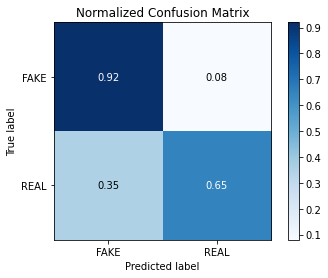

In [ ]:
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_NB, normalize = True)
plt.show()

## K-Nearest Neighbors algorithm

In [ ]:
#KNN = KNeighborsClassifier(metric = 'euclidean')
KNN = KNeighborsClassifier()
KNN.fit(x_train_df, train_set.label)
predicted_values_KNN = KNN.predict(x_test_df)
print(predicted_values_KNN)

['FAKE' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'FAKE']


In [ ]:
accuracy_KNN = accuracy_score(test_set.label, predicted_values_KNN)
predictions['K-Nearest Neighbors algorithm'] = accuracy_KNN * 100
print("\nThe accuracy of K-Nearest Neighbors algorithm is {}%".format(accuracy_KNN * 100))
confusion_matrix_KNN = confusion_matrix(test_set.label, predicted_values_KNN)
print("\n", confusion_matrix_KNN)


The accuracy of K-Nearest Neighbors algorithm is 64.47878787878788%

 [[29883  2930]
 [20514 12673]]


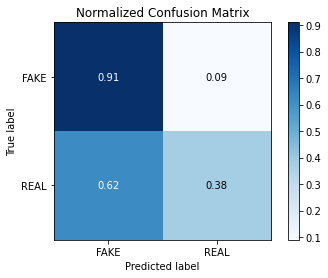

In [ ]:
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_KNN, normalize = True)
plt.show()

## Decision Tree

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(x_train_df, train_set.label)
predicted_values_DT = DT.predict(x_test_df)
print(predicted_values_DT)

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']


In [ ]:
accuracy_DT = accuracy_score(test_set.label, predicted_values_DT)
predictions['Decision Tree learning'] = accuracy_DT * 100
print("\nThe accuracy of Decision Tree learning is {}%".format(accuracy_DT * 100))
confusion_matrix_DT = confusion_matrix(test_set.label, predicted_values_DT)
print("\n", confusion_matrix_DT)


The accuracy of Decision Tree learning is 79.32272727272728%

 [[31527  1286]
 [12361 20826]]


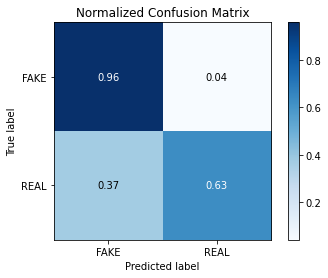

In [ ]:
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_DT, normalize = True)
plt.show()

## Support Vector Machine (SVM)

In [ ]:
SVM = svm.SVC()
SVM.fit(x_train_df, train_set.label)
predicted_values_SVM = SVM.predict(x_test_df)
print(predicted_values_SVM)

['REAL' 'FAKE' 'FAKE' ... 'FAKE' 'FAKE' 'REAL']


In [ ]:
accuracy_SVM = accuracy_score(test_set.label, predicted_values_SVM)
predictions['Support Vector Machine (SVM)'] = accuracy_SVM * 100
print("\nThe accuracy of Support Vector Machine (SVM) is {}%".format(accuracy_SVM * 100))
confusion_matrix_SVM = confusion_matrix(test_set.label, predicted_values_SVM)
print("\n", confusion_matrix_SVM)


The accuracy of Support Vector Machine (SVM) is 85.08181818181818%

 [[30287  2526]
 [ 7320 25867]]


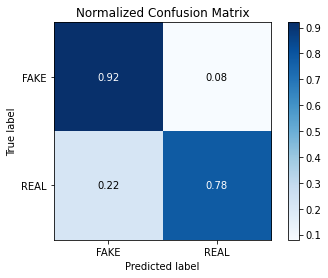

In [ ]:
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_SVM, normalize = True)
plt.show()

## Random Forest

In [ ]:
RF = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state = 123456)
RF.fit(x_train_df, train_set.label)
predicted_values_RF = RF.predict(x_test_df)
print(predicted_values_RF)

['REAL' 'FAKE' 'REAL' ... 'FAKE' 'FAKE' 'REAL']


In [ ]:
accuracy_RF = accuracy_score(test_set.label, predicted_values_RF)
predictions['Random Forest'] = accuracy_RF * 100
print("\nThe accuracy of Random Forest is {}%".format(accuracy_RF * 100))
confusion_matrix_RF = confusion_matrix(test_set.label, predicted_values_RF)


The accuracy of Random Forest is 81.36515151515151%



 [[31410  1403]
 [10896 22291]]


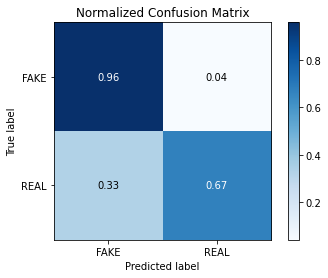

In [ ]:
print("\n", confusion_matrix_RF)
skplt.metrics.plot_confusion_matrix(test_set.label, predicted_values_RF, normalize = True)
plt.show()

Let's compare the models

,Algorithms,Percentage
0,Naive Bayes,78.750000
1,K-Nearest Neighbors algorithm,64.478788
2,Decision Tree learning,79.322727
3,Support Vector Machine (SVM),85.081818
4,Random Forest,81.365152


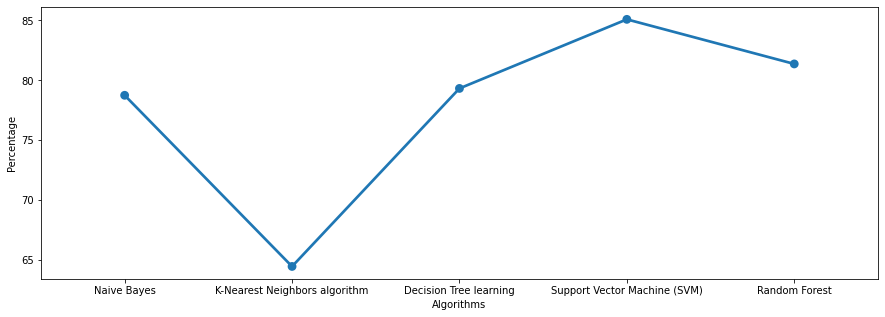

In [ ]:
fig, (ax1) = plt.subplots(ncols = 1, sharey = True,figsize = (15,5))
df = pd.DataFrame(list(predictions.items()),columns = ['Algorithms','Percentage'])
display(df)
sns.pointplot(x = "Algorithms", y = "Percentage", data = df,ax = ax1);

## Check the accuracy

In [86]:
#pr, tpr, thresholds = roc_curve(testset.v1,predicted_values_XGB, pos_label=2)
test_prediction = test_set.label.tolist()
predicted_values = predicted_values_SVM.tolist()
test_prediction = [1 if pred=="REAL" else 0 for pred in test_prediction]
predicted_values = [1 if pred=="REAL" else 0 for pred in predicted_values]
fpr, tpr, thresholds = roc_curve(test_prediction,predicted_values)
roc_auc = auc(fpr, tpr)
print("The ROC Accuracy is {}".format(roc_auc))

The ROC Accuracy is 0.8512250105485711


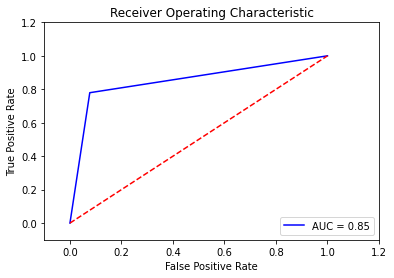

In [87]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()